# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8036,8602_01,Earth,True,G/1396/P,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,Robina Weissey,False
4645,4944_02,Europa,False,A/60/S,55 Cancri e,58.0,False,0.0,3448.0,0.0,737.0,2193.0,Sular Ainserfle,False
7940,8477_01,Earth,False,F/1633/S,TRAPPIST-1e,23.0,False,0.0,1.0,51.0,1711.0,219.0,Ellie Hickerson,False
8290,8853_01,Earth,False,G/1433/P,PSO J318.5-22,24.0,False,726.0,3488.0,200.0,17.0,275.0,Kimena Ellahan,False
6180,6525_03,Earth,True,G/1061/S,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Raceky Cardners,True


**Check the shape of your data**

In [3]:
#your code here
initial_data=spaceship.shape[0]
initial_data

8693

**Check for data types**

In [4]:
#your code here
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Check for missing values**

In [5]:
spaceship["CryoSleep"].isnull().value_counts()

CryoSleep
False    8476
True      217
Name: count, dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [6]:
#Se eliminan todas las filas con al menos un valor nulo en las columnas
spaceship_1 = spaceship.dropna()

In [7]:
datos_totales=initial_data-spaceship_1.shape[0]
datos_totales
print(f"Se mantuvo un total de {datos_totales} datos, es decir, el {round(datos_totales/initial_data*100,2)} % del total inicial")

Se mantuvo un total de 2087 datos, es decir, el 24.01 % del total inicial


**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [8]:
#your code here
spaceship_1num = spaceship_1[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

And also lets define our target.

In [9]:
#Se definie la columna Transported como el target y se agrega al dataframe numérico
spaceship_1num.loc[:, "Target"] = spaceship_1["Transported"]

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_27752\2305616425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_1num.loc[:, "Target"] = spaceship_1["Transported"]


#### Se verifica la correlación entre las variables (Quick EDA)

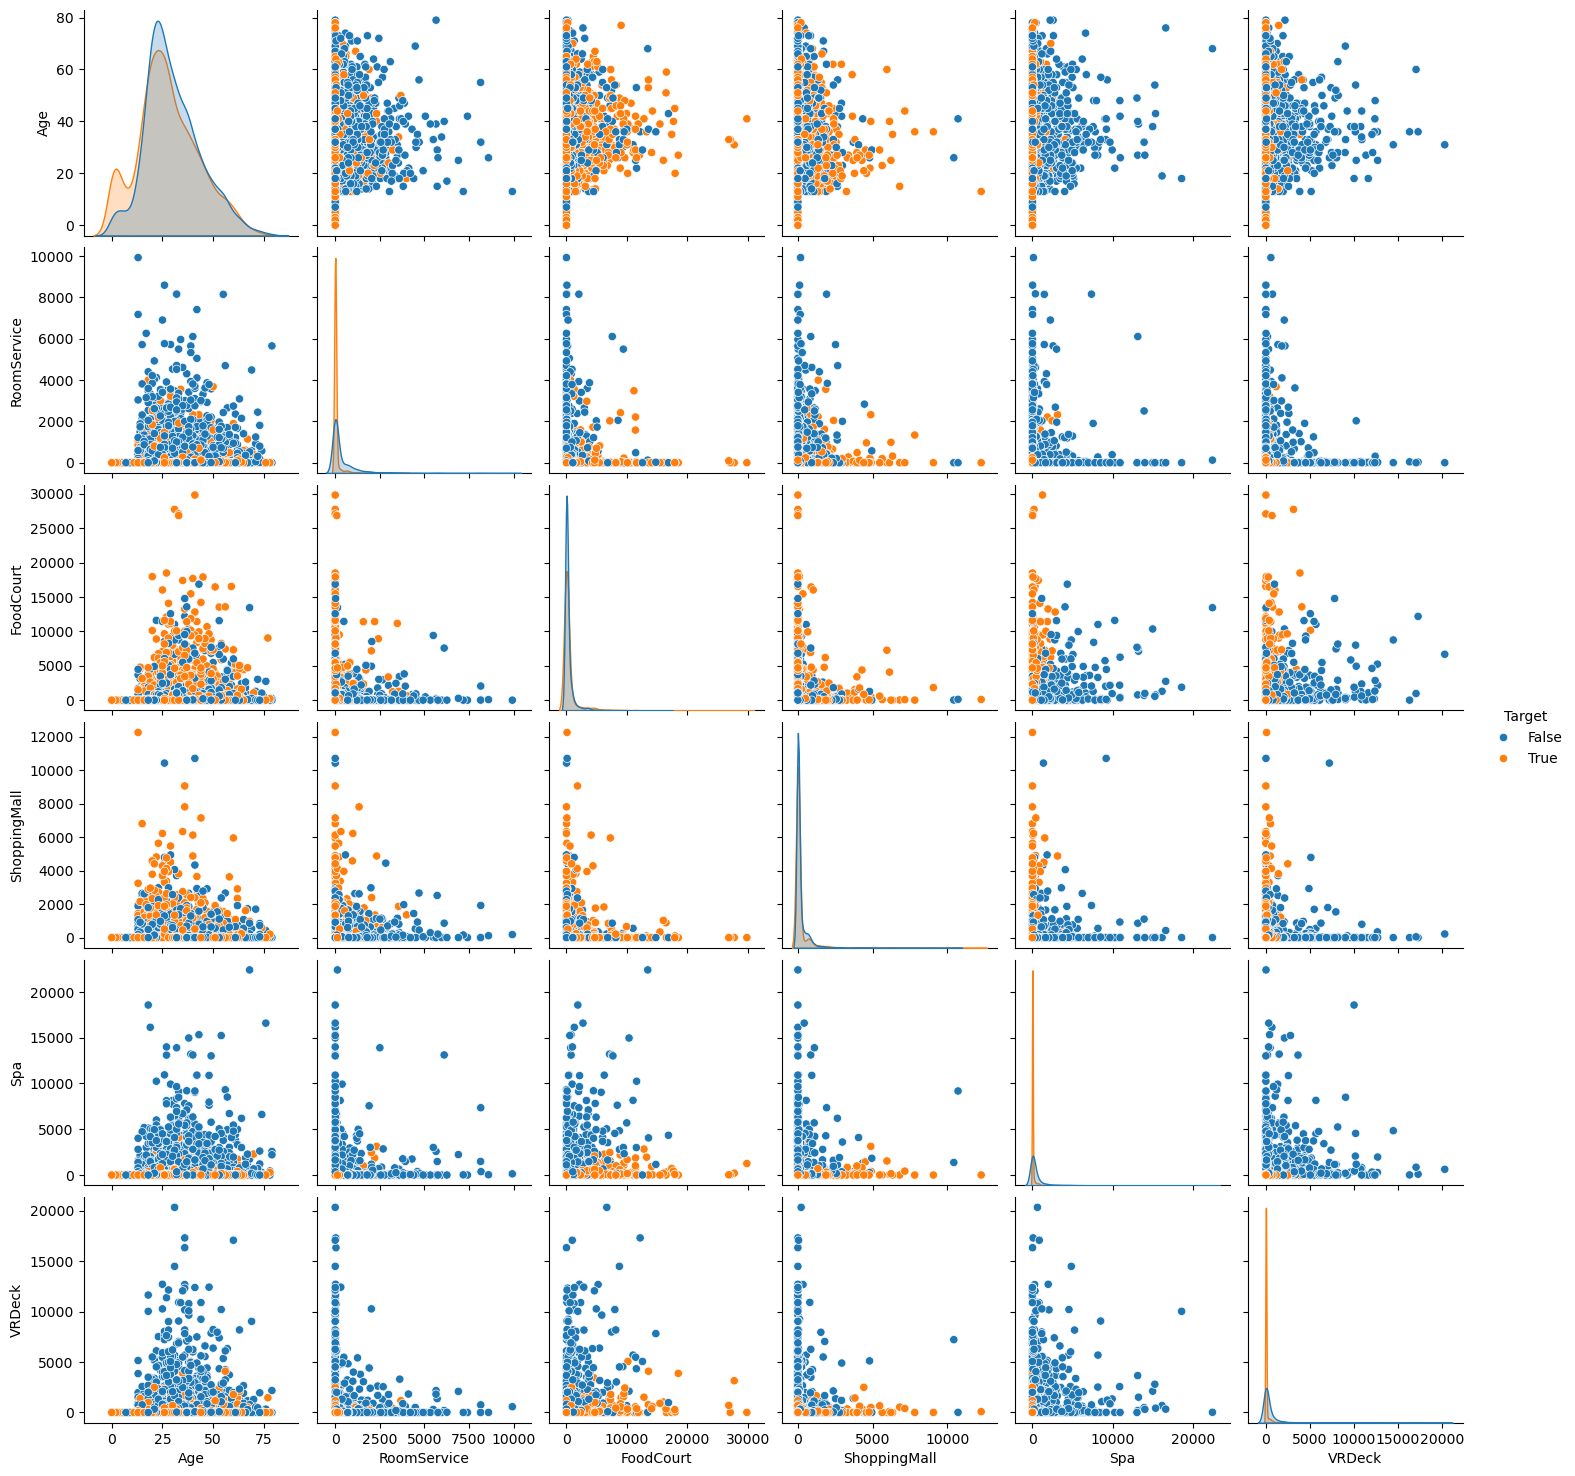

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(spaceship_1num, hue="Target")
plt.show()

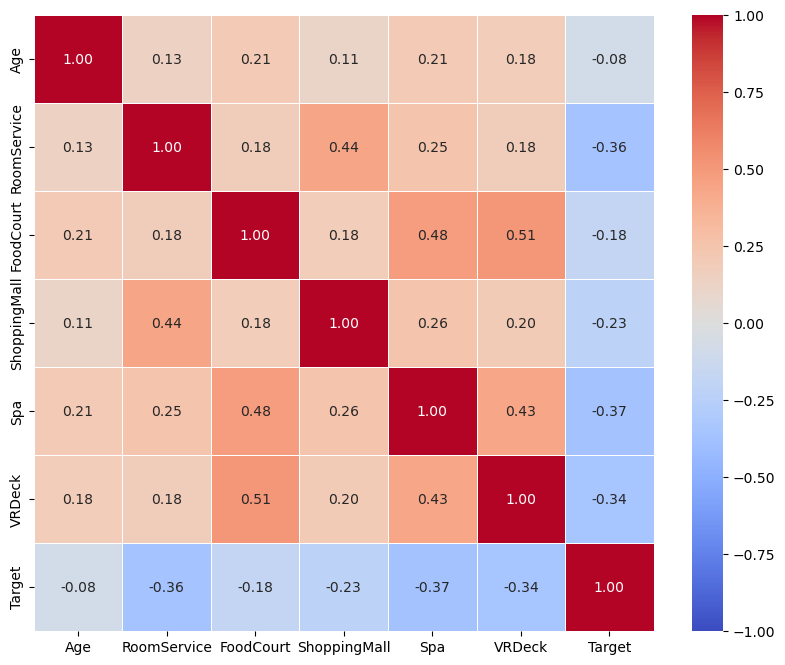

In [11]:
#Se genera matriz de correlación lineal
correlation_matrix = spaceship_1num.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,vmin=-1, vmax=1)
plt.show()

Se observa que target está relacionada con todas las variables en cierta medida. La menor correlación posible es con Age, por lo que se harán pruebas con el modelo incluyendo y excluyendo esta variable.

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [12]:
#Se generan dataframes para características y targets
features = spaceship_1num.drop(columns = ["Target"])
target = spaceship_1num["Target"]

#Se ejecuta la división de datos para entrenar y probar el modelo, considerando X para features (variables independientes)
#  y Y para target (variable dependiente a predecir). Se asigna el 80% de los datos para entrenar el modelo, 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [13]:
from sklearn.neighbors import KNeighborsClassifier # selecciono el método que permite clasificar en lugar de regressor por 
#la naturaleza de mi target

knn = KNeighborsClassifier(n_neighbors=10) # indico el número de vecinos

Fit the model to your data.

In [14]:
#Se entrena el modelo con los datos.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Evaluate your model.

In [15]:
predictions = knn.predict(X_test)
predictions

array([ True,  True,  True, ...,  True,  True,  True])

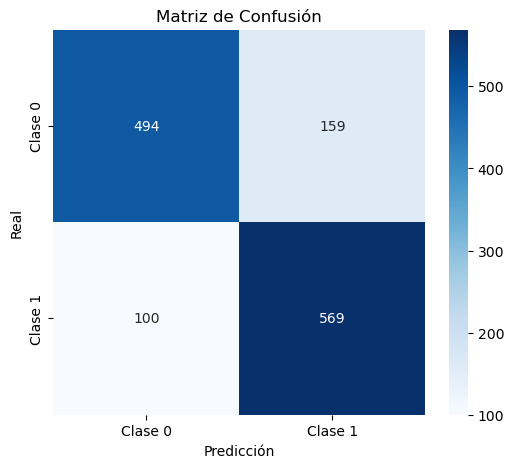

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Configuración de la figura para el gráfico
plt.figure(figsize=(6, 5))

# Graficar el mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])

# Títulos y etiquetas
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')

# Mostrar el gráfico
plt.show()


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
report = classification_report(y_test, predictions, target_names=['True', 'False'], output_dict=True)

# Convertir el reporte (diccionario) en un DataFrame
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
True,0.831650,0.756508,0.792302,653.000000
False,0.781593,0.850523,0.814603,669.000000
accuracy,0.804085,0.804085,0.804085,0.804085
macro avg,0.806622,0.803516,0.803452,1322.000000
weighted avg,0.806319,0.804085,0.803587,1322.000000


Se logró un modelo con precisión de 83.1%, 79.2% cuando las clases están desequilibradas. Para buscar una mejor aproximación, se estandarizarán y normalizarán los datos, y se realizarán pruebas.

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ---Standardize the data
scaler = StandardScaler() #cargo el escalador
#Estandariza el conjunto de entrenamiento (X_train) para que cada característica tenga una media de 0 y una desviación estándar de 1.
X_train_standardized = scaler.fit_transform(X_train) 
#ransforma el conjunto de prueba (X_test) utilizando las estadísticas calculadas en el conjunto de entrenamiento, para que las características en ambos conjuntos tengan la misma escala.
X_test_standardized = scaler.transform(X_test) 

# ---Normalize the data
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

# ---Standardize and Normalize the data
X_train_st_norm = normalizer.fit_transform(X_train_standardized)
X_test_st_norm = normalizer.transform(X_test_standardized)

### Ahora se entrena y prueba nuevamente el modelo con los datos modificados.

#### Datos estandarizados:

In [19]:
from sklearn.neighbors import KNeighborsClassifier # selecciono el método que permite clasificar en lugar de regressor por 
#la naturaleza de mi target
knn = KNeighborsClassifier(n_neighbors=10) # indico el número de vecinos
#Se entrena el modelo con los datos.
knn.fit(X_train_standardized, y_train)
predictions_standardized = knn.predict(X_test_standardized)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
report_standardized = classification_report(y_test, predictions_standardized, target_names=['True', 'False'], output_dict=True)
# Convertir el reporte (diccionario) en un DataFrame
df_report_standardized = pd.DataFrame(report_standardized).transpose()
df_report_standardized

,precision,recall,f1-score,support
True,0.803005,0.736600,0.768371,653.000000
False,0.762102,0.823617,0.791667,669.000000
accuracy,0.780635,0.780635,0.780635,0.780635
macro avg,0.782554,0.780109,0.780019,1322.000000
weighted avg,0.782306,0.780635,0.780160,1322.000000


### Datos Normalizados

In [20]:
from sklearn.neighbors import KNeighborsClassifier # selecciono el método que permite clasificar en lugar de regressor por 
#la naturaleza de mi target
knn = KNeighborsClassifier(n_neighbors=10) # indico el número de vecinos
#Se entrena el modelo con los datos.
knn.fit(X_train_normalized, y_train)
predictions_normalized = knn.predict(X_test_normalized)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
report_normalized = classification_report(y_test, predictions_normalized, target_names=['True', 'False'], output_dict=True)
# Convertir el reporte (diccionario) en un DataFrame
df_report_normalized = pd.DataFrame(report_normalized).transpose()
df_report_normalized

,precision,recall,f1-score,support
True,0.808950,0.719755,0.761750,653.00000
False,0.753036,0.834081,0.791489,669.00000
accuracy,0.777610,0.777610,0.777610,0.77761
macro avg,0.780993,0.776918,0.776620,1322.00000
weighted avg,0.780655,0.777610,0.776800,1322.00000


### Datos estandarizados y normalizados

In [21]:
from sklearn.neighbors import KNeighborsClassifier # selecciono el método que permite clasificar en lugar de regressor por 
#la naturaleza de mi target
knn = KNeighborsClassifier(n_neighbors=10) # indico el número de vecinos
#Se entrena el modelo con los datos.
knn.fit(X_train_st_norm, y_train)
predictions_st_norm = knn.predict(X_test_st_norm)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
report_st_norm = classification_report(y_test, predictions_st_norm, target_names=['True', 'False'], output_dict=True)
# Convertir el reporte (diccionario) en un DataFrame
df_report_st_norm = pd.DataFrame(report_st_norm).transpose()
df_report_st_norm

,precision,recall,f1-score,support
True,0.808621,0.718224,0.760746,653.000000
False,0.752022,0.834081,0.790928,669.000000
accuracy,0.776853,0.776853,0.776853,0.776853
macro avg,0.780321,0.776152,0.775837,1322.000000
weighted avg,0.779979,0.776853,0.776020,1322.000000


**Congratulations, you have just developed your first Machine Learning model!**